In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
df = pd.read_excel('data/AKtywność MlrA_McC7_MlrA20220408.ods')
df1 = df[1:]
df2 = df1.filter([
    'Unnamed: 0',
    'MlrA activity/mg protein',
    'MlrA activity/mg protein.1',
    'MlrA activity/mg protein.2',
])
df2 = df2.rename(columns={'Unnamed: 0': 'Próbka'})
df2 = df2[df2['MlrA activity/mg protein'].notna()]
df2

,Próbka,MlrA activity/mg protein,MlrA activity/mg protein.1,MlrA activity/mg protein.2
1,K 25.03,5849.766148,724.799687,419.432625
4,K 28.03,2880.477582,623.307160,385.459116
7,K 31.03,855.281171,342.241869,229.940977
10,K 04.04,742.242267,302.809613,222.939078
13,K 31.03,855.281171,342.241869,229.940977
16,K 04.04,742.242267,302.809613,222.939078
19,WW2 25.03,1083.034312,444.850050,294.132430
22,WW2 28.03,838.086761,411.505648,292.925426
25,WW2 31.03,679.004933,298.961960,214.080034
28,WW2 04.04,746.845202,277.940236,195.467595


In [44]:
def formatted_bar(ax, y):
    ax.bar(
        x=df2['Próbka'],
        height=y,
        align='center',
        alpha=0.5,
        color='blue',
        width=0.4,
    )

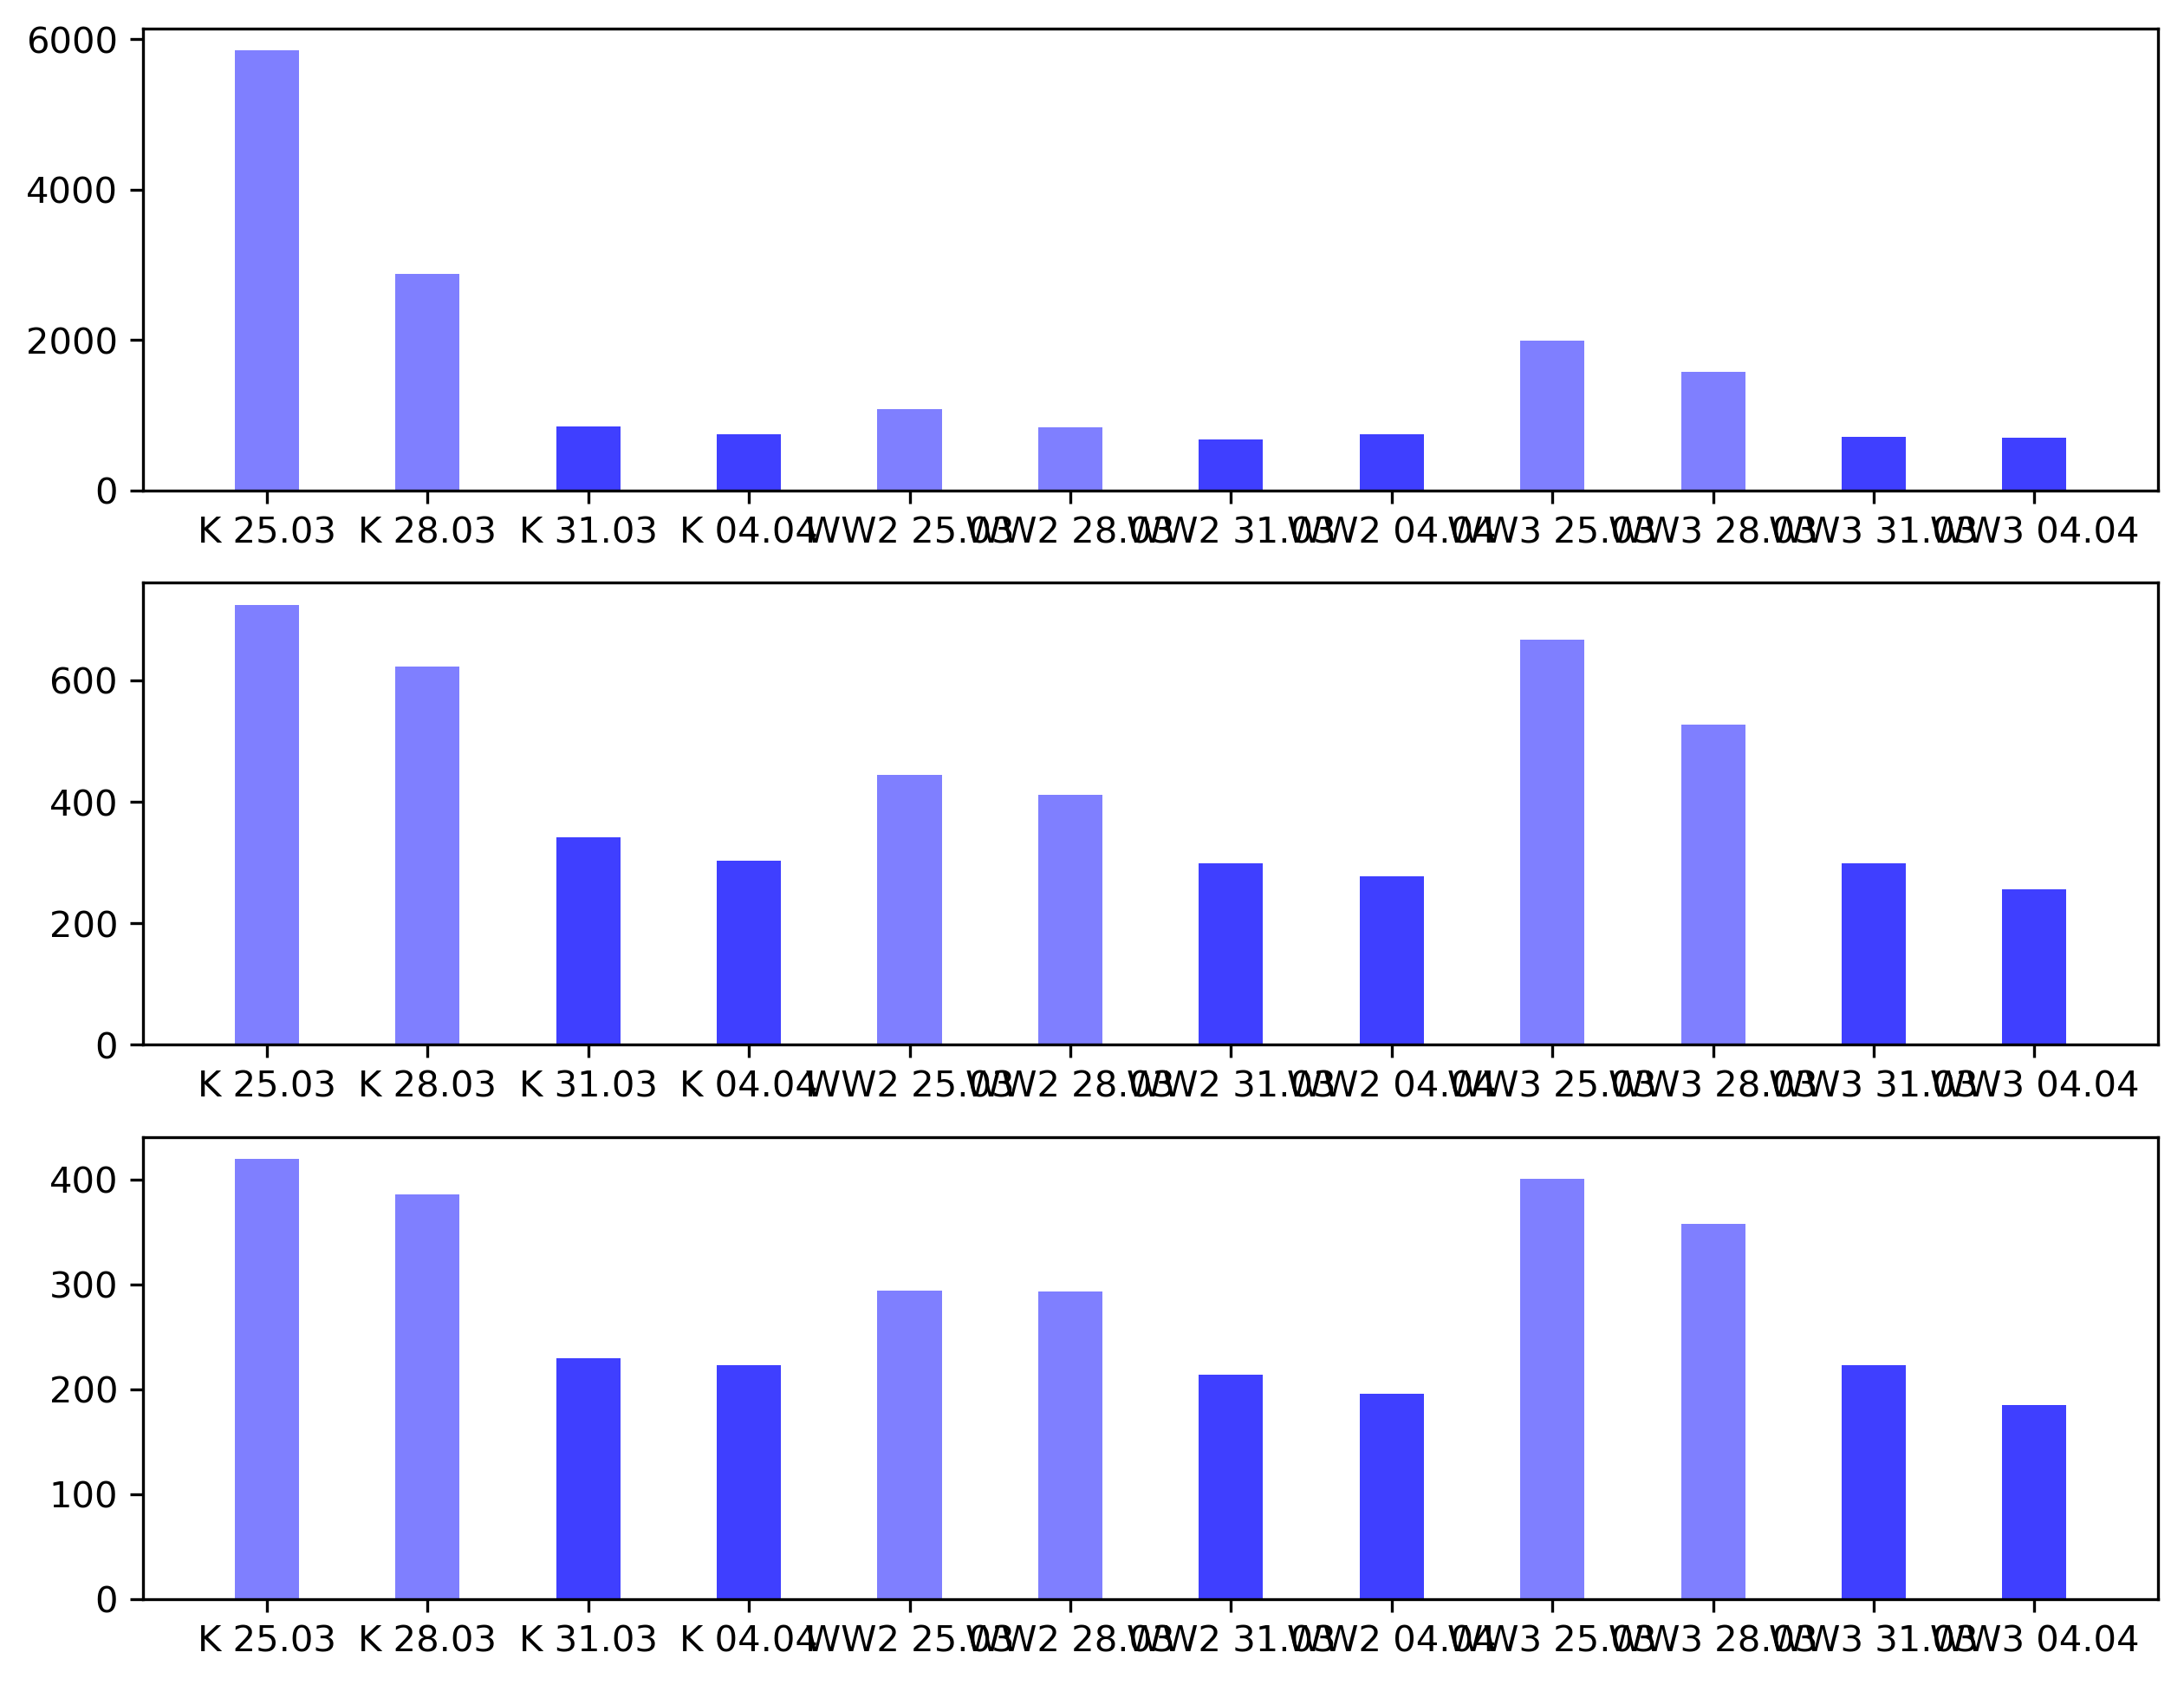

In [45]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(10,8), dpi=300)
formatted_bar(ax1, df2['MlrA activity/mg protein'])
formatted_bar(ax2, df2['MlrA activity/mg protein.1'])
formatted_bar(ax3, df2['MlrA activity/mg protein.2'])
plt.show()